<a href="https://colab.research.google.com/github/SamTremblay18/Hockey-Shot-Classification/blob/main/CNN_Method5_HANDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Method 5 -  Reframe to 576 frames and HSC (Hands sensor configuration)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from google.colab import drive 
drive.mount('/content/drive')
import pickle
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers 
from keras import models
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [2]:
def open_pickle(path_pickle):
  f = open(path_pickle, 'rb')
  P = pickle.load(f)
  f.close()

  return P

In [3]:
X_train_all = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train_all5.pickle')
y_train_all = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train_all5.pickle')

In [4]:
X_test1 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_test5.pickle')
X_train1 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train5_1.pickle')
y_test1 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_test5.pickle')
y_train1 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train5_1.pickle')
X_valid1 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_valid5_1.pickle')
y_valid1 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_valid5_1.pickle')

In [34]:
X_train2 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train5_2.pickle')
y_train2 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train5_2.pickle')
X_valid2 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_valid5_2.pickle')
y_valid2 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_valid5_2.pickle')

In [35]:
X_train3 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train5_3.pickle')
y_train3 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train5_3.pickle')
X_valid3 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_valid5_3.pickle')
y_valid3 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_valid5_3.pickle')

In [36]:
X_train4 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train5_4.pickle')
y_train4 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train5_4.pickle')
X_valid4 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_valid5_4.pickle')
y_valid4 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_valid5_4.pickle')

In [37]:
X_train5 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train5_5.pickle')
y_train5 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train5_5.pickle')
X_valid5 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_valid5_5.pickle')
y_valid5 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_valid5_5.pickle')

#Model based on the All sensor configuration model

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    conv3 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    conv3 = keras.layers.Dropout(0.5)(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model2.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

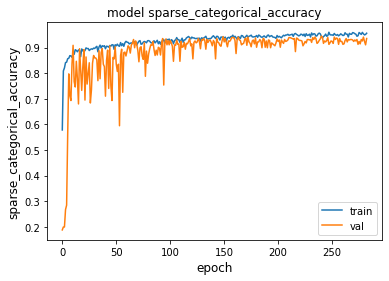

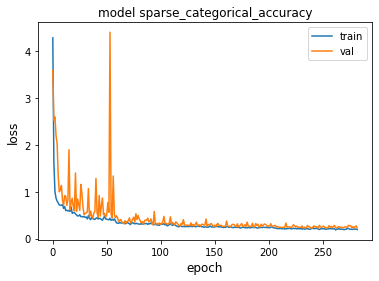

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

# KerasTuner

In [ ]:
pip install keras-tuner

In [ ]:
import kerastuner as kt

In [ ]:
def build_model2(hp):
  input_layer = keras.layers.Input(X_train1.shape[1:])

  conv1 = keras.layers.Conv1D(
          filters = hp.Int('filters1', 64, 256, step=64),
          kernel_size = hp.Int('kernel_size1', 3, 5),
          kernel_regularizer = hp.Choice('regularizers1', ['L1', 'L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)
  conv1 = keras.layers.Dropout(
          rate = hp.Float('dropout1', 0, 0.5, step=0.1))(conv1)

  conv2 = keras.layers.Conv1D(          
          filters = hp.Int('filters2', 64, 256, step=64),
          kernel_size = hp.Int('kernel_size2', 3, 5),
          kernel_regularizer = hp.Choice('regularizers2', ['L1', 'L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv1)
  conv2 = keras.layers.Dropout(
          rate = hp.Float('dropout2', 0, 0.5,step=0.1))(conv2)

  conv3 = keras.layers.Conv1D(
          filters = hp.Int('filters3', 64, 256, step=64),
          kernel_size = hp.Int('kernel_size3', 3, 5),
          kernel_regularizer = hp.Choice('regularizers3', ['L1', 'L2', 'l1_l2']),
          padding = 'same')(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)
  conv3 = keras.layers.Dropout(
          rate = hp.Float('dropout3', 0, 0.5, step=0.1))(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  output_layer = keras.layers.Dense(7, activation="softmax")(gap)

  model = keras.Model(input_layer, output_layer)

  optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])

  model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

  return model

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
    keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=20, verbose=1)]


In [ ]:
tuner = kt.RandomSearch(
    hypermodel = build_model2,
    objective = 'val_sparse_categorical_accuracy',
    max_trials = 100,
    executions_per_trial = 1,
    overwrite = True,
    directory = 'random_search',
    project_name = 'all_sensors_tuner2',
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 13
filters1 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': None}
kernel_size1 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 5, 'step': 1, 'sampling': None}
regularizers1 (Choice)
{'default': 'L1', 'conditions': [], 'values': ['L1', 'L2', 'l1_l2'], 'ordered': False}
dropout1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
filters2 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': None}
kernel_size2 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 5, 'step': 1, 'sampling': None}
regularizers2 (Choice)
{'default': 'L1', 'conditions': [], 'values': ['L1', 'L2', 'l1_l2'], 'ordered': False}
dropout2 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
filters3 (Int)
{'default': 

In [ ]:
tuner.search(X_train1, 
             y_train1, 
             epochs=250, 
             validation_data=(X_valid1, y_valid1),
             callbacks=callbacks)

Trial 100 Complete [00h 01m 14s]
val_sparse_categorical_accuracy: 0.9032257795333862

Best val_sparse_categorical_accuracy So Far: 0.9384164214134216
Total elapsed time: 01h 20m 57s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in random_search/all_sensors_tuner2
Showing 10 best trials
Trial summary
Hyperparameters:
filters1: 256
kernel_size1: 5
regularizers1: L2
dropout1: 0.2
filters2: 192
kernel_size2: 4
regularizers2: l1_l2
dropout2: 0.0
filters3: 256
kernel_size3: 4
regularizers3: L2
dropout3: 0.1
optimizer: sgd
Score: 0.9384164214134216
Trial summary
Hyperparameters:
filters1: 128
kernel_size1: 4
regularizers1: L2
dropout1: 0.4
filters2: 128
kernel_size2: 5
regularizers2: L2
dropout2: 0.2
filters3: 64
kernel_size3: 4
regularizers3: L2
dropout3: 0.2
optimizer: adam
Score: 0.9325513243675232
Trial summary
Hyperparameters:
filters1: 128
kernel_size1: 5
regularizers1: L1
dropout1: 0.2
filters2: 128
kernel_size2: 4
regularizers2: l1_l2
dropout2: 0.30000000000000004
filters3: 128
kernel_size3: 3
regularizers3: L2
dropout3: 0.30000000000000004
optimizer: adam
Score: 0.929618775844574
Trial summary
Hyperparameters:
filters1: 192
kernel_size1: 4
regularizers1: L2
dropout1: 0.5
filters2: 12

In [ ]:
def build_model3(hp):
  input_layer = keras.layers.Input(X_train1.shape[1:])

  conv1 = keras.layers.Conv1D(
          filters = hp.Int('filters1', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size1', 3, 4),
          kernel_regularizer = hp.Choice('regularizers1', ['L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)
  conv1 = keras.layers.Dropout(
          rate = hp.Float('dropout1', 0.3, 0.5, step=0.1))(conv1)

  conv2 = keras.layers.Conv1D(          
          filters = hp.Int('filters2', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size2', 3, 4),
          kernel_regularizer = hp.Choice('regularizers2', ['L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv1)
  conv2 = keras.layers.Dropout(
          rate = hp.Float('dropout2', 0.3, 0.5,step=0.1))(conv2)

  conv3 = keras.layers.Conv1D(
          filters = hp.Int('filters3', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size3', 3, 4),
          kernel_regularizer = hp.Choice('regularizers3', ['L2', 'l1_l2']),
          padding = 'same')(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)
  conv3 = keras.layers.Dropout(
          rate = hp.Float('dropout3', 0.3, 0.5, step=0.1))(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  output_layer = keras.layers.Dense(7, activation="softmax")(gap)

  model = keras.Model(input_layer, output_layer)

  optimizer = hp.Choice('optimizer', ['adam', 'sgd'])

  model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

  return model

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
    keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=30, verbose=1)]


In [ ]:
tuner = kt.RandomSearch(
    hypermodel = build_model3,
    objective = 'val_sparse_categorical_accuracy',
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = 'random_search',
    project_name = 'hands_sensors_tuner3',
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 13
filters1 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 256, 'step': 64, 'sampling': None}
kernel_size1 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 4, 'step': 1, 'sampling': None}
regularizers1 (Choice)
{'default': 'L2', 'conditions': [], 'values': ['L2', 'l1_l2'], 'ordered': False}
dropout1 (Float)
{'default': 0.3, 'conditions': [], 'min_value': 0.3, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
filters2 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 256, 'step': 64, 'sampling': None}
kernel_size2 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 4, 'step': 1, 'sampling': None}
regularizers2 (Choice)
{'default': 'L2', 'conditions': [], 'values': ['L2', 'l1_l2'], 'ordered': False}
dropout2 (Float)
{'default': 0.3, 'conditions': [], 'min_value': 0.3, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
filters3 (Int)
{'default': None, 'con

In [ ]:
tuner.search(X_train1, 
             y_train1, 
             epochs=200, 
             validation_data=(X_valid1, y_valid1),
             callbacks=callbacks)

In [ ]:
tuner.results_summary()

Results summary
Results in random_search/hands_sensors_tuner3
Showing 10 best trials
Trial summary
Hyperparameters:
filters1: 192
kernel_size1: 3
regularizers1: l1_l2
dropout1: 0.3
filters2: 256
kernel_size2: 3
regularizers2: L2
dropout2: 0.5
filters3: 192
kernel_size3: 4
regularizers3: L2
dropout3: 0.4
optimizer: adam
Score: 0.9472140669822693
Trial summary
Hyperparameters:
filters1: 256
kernel_size1: 4
regularizers1: l1_l2
dropout1: 0.5
filters2: 192
kernel_size2: 3
regularizers2: L2
dropout2: 0.5
filters3: 256
kernel_size3: 4
regularizers3: L2
dropout3: 0.5
optimizer: adam
Score: 0.9472140669822693
Trial summary
Hyperparameters:
filters1: 256
kernel_size1: 3
regularizers1: l1_l2
dropout1: 0.4
filters2: 128
kernel_size2: 4
regularizers2: l1_l2
dropout2: 0.5
filters3: 192
kernel_size3: 3
regularizers3: L2
dropout3: 0.4
optimizer: adam
Score: 0.9472140669822693
Trial summary
Hyperparameters:
filters1: 256
kernel_size1: 4
regularizers1: l1_l2
dropout1: 0.3
filters2: 192
kernel_size2: 4


# Cross-validation based on tune model

## FOLD 1

In [45]:
acc_per_fold = []
loss_per_fold = []

In [5]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=192, kernel_size=4, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=192, kernel_size=4, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    conv3 = keras.layers.Conv1D(filters=192, kernel_size=4, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    conv3 = keras.layers.Dropout(0.5)(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model = make_model(input_shape=X_train1.shape[1:])

epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model2_fold1.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train1,
    y_train1,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(X_valid1,y_valid1),
    verbose=1,
)

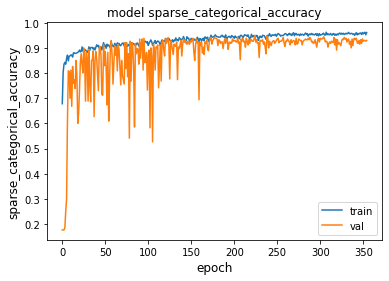

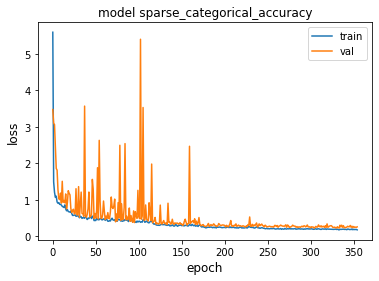

In [48]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [49]:
score1 = model.evaluate(X_valid1, y_valid1, verbose=0)
print(f'Score for fold 1: {model.metrics_names[0]} of {score1[0]}; {model.metrics_names[1]} of {score1[1]*100}%')
acc_per_fold.append(score1[1] * 100)
loss_per_fold.append(score1[0])

Score for fold 1: loss of 0.2559625804424286; sparse_categorical_accuracy of 92.9411768913269%


## FOLD 2

In [50]:
model = make_model(input_shape=X_train2.shape[1:])

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model2_fold2.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train2,
    y_train2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(X_valid2,y_valid2),
    verbose=1,
)

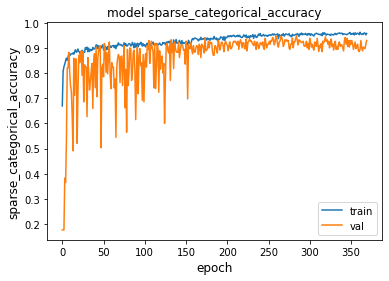

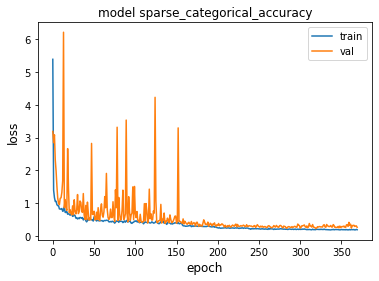

In [52]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [53]:
score2 = model.evaluate(X_valid2, y_valid2, verbose=0)
print(f'Score for fold 2: {model.metrics_names[0]} of {score2[0]}; {model.metrics_names[1]} of {score2[1]*100}%')
acc_per_fold.append(score2[1] * 100)
loss_per_fold.append(score2[0])

Score for fold 2: loss of 0.25764724612236023; sparse_categorical_accuracy of 92.9411768913269%


##FOLD 3

In [54]:
model = make_model(input_shape=X_train3.shape[1:])

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model2_fold3.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train3,
    y_train3,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(X_valid3,y_valid3),
    verbose=1,
)

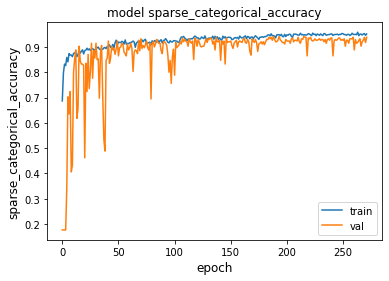

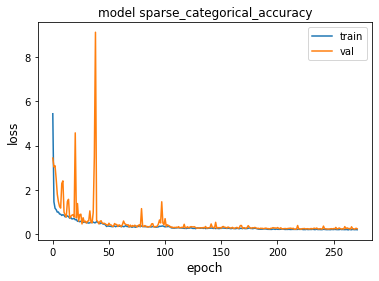

In [56]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [57]:
score3 = model.evaluate(X_valid3, y_valid3, verbose=0)
print(f'Score for fold 3: {model.metrics_names[0]} of {score3[0]}; {model.metrics_names[1]} of {score3[1]*100}%')
acc_per_fold.append(score3[1] * 100)
loss_per_fold.append(score3[0])

Score for fold 3: loss of 0.24180373549461365; sparse_categorical_accuracy of 93.82352828979492%


## FOLD 4

In [58]:
model = make_model(input_shape=X_train4.shape[1:])

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model2_fold4.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train4,
    y_train4,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(X_valid4,y_valid4),
    verbose=1,
)

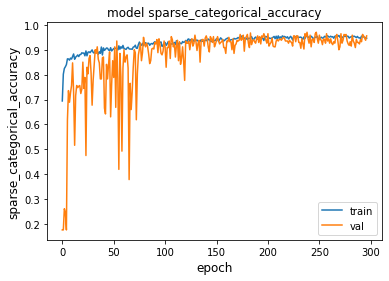

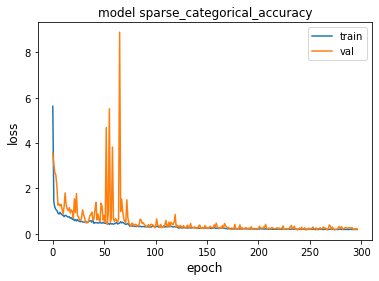

In [60]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [61]:
score4 = model.evaluate(X_valid4, y_valid4, verbose=0)
print(f'Score for fold 4: {model.metrics_names[0]} of {score4[0]}; {model.metrics_names[1]} of {score4[1]*100}%')
acc_per_fold.append(score4[1] * 100)
loss_per_fold.append(score4[0])

Score for fold 4: loss of 0.1920248121023178; sparse_categorical_accuracy of 95.6011712551117%


## FOLD 5

In [62]:
model = make_model(input_shape=X_train5.shape[1:])

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model2_fold5.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train5,
    y_train5,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(X_valid5,y_valid5),
    verbose=1,
)

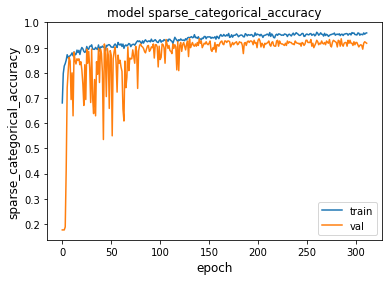

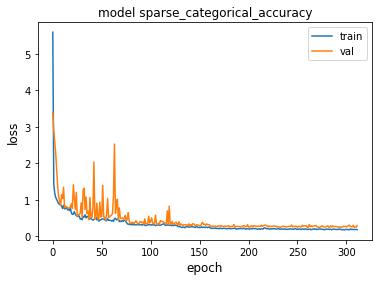

In [64]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [65]:
score5 = model.evaluate(X_valid5, y_valid5, verbose=0)
print(f'Score for fold 5: {model.metrics_names[0]} of {score5[0]}; {model.metrics_names[1]} of {score5[1]*100}%')
acc_per_fold.append(score5[1] * 100)
loss_per_fold.append(score5[0])

Score for fold 5: loss of 0.2988708019256592; sparse_categorical_accuracy of 91.76470637321472%


## Total cross-validation scores

In [66]:
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.2559625804424286 - Accuracy: 92.9411768913269%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.25764724612236023 - Accuracy: 92.9411768913269%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.24180373549461365 - Accuracy: 93.82352828979492%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.1920248121023178 - Accuracy: 95.6011712551117%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.2988708019256592 - Accuracy: 91.76470637321472%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 93.41435194015503 (+- 1.274262433846731)
> Loss: 0.24926183521747589
-----------------------------

# Train on full dataset and evaluate on test set

In [6]:
model = make_model(input_shape=X_train_all.shape[1:])

epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model_train_all5.h5", save_best_only=True, monitor="loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)
history = model.fit(
    X_train_all,
    y_train_all,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/500
83/83 [==============================] - 13s 12ms/step - loss: 5.0681 - sparse_categorical_accuracy: 0.6759 - lr: 0.0010
Epoch 2/500
83/83 [==============================] - 1s 12ms/step - loss: 1.3265 - sparse_categorical_accuracy: 0.8177 - lr: 0.0010
Epoch 3/500
83/83 [==============================] - 1s 12ms/step - loss: 1.1148 - sparse_categorical_accuracy: 0.8306 - lr: 0.0010
Epoch 4/500
83/83 [==============================] - 1s 12ms/step - loss: 1.0135 - sparse_categorical_accuracy: 0.8487 - lr: 0.0010
Epoch 5/500
83/83 [==============================] - 1s 12ms/step - loss: 0.9668 - sparse_categorical_accuracy: 0.8552 - lr: 0.0010
Epoch 6/500
83/83 [==============================] - 1s 12ms/step - loss: 0.9194 - sparse_categorical_accuracy: 0.8673 - lr: 0.0010
Epoch 7/500
83/83 [==============================] - 1s 12ms/step - loss: 0.9133 - sparse_categorical_accuracy: 0.8537 - lr: 0.0010
Epoch 8/500
83/83 [==============================] - 1s 12ms/step - loss: 0

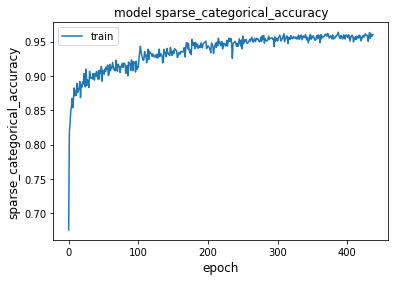

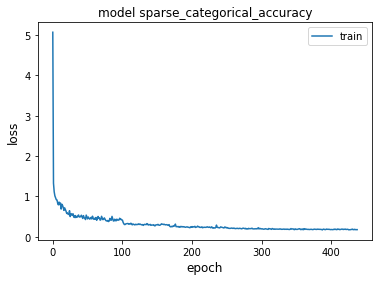

In [7]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train"], loc="best")
plt.show()
plt.close()

In [8]:
final_model = keras.models.load_model("model_train_all5.h5")

test_loss, test_acc = model.evaluate(X_test1, y_test1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

22/22 [==============================] - 0s 5ms/step - loss: 0.2714 - sparse_categorical_accuracy: 0.9369
Test accuracy 0.9368575811386108
Test loss 0.2713924050331116


In [23]:
labels = ['BH', 'OT', 'Other', 'Pass', 'Rest', 'SS', 'WS']

predict_X_test = model.predict(X_test1) 
y_pred = np.argmax(predict_X_test,axis=1)

print(classification_report(y_test1, y_pred, target_names=labels, digits=4))

              precision    recall  f1-score   support

          BH     0.9877    1.0000    0.9938        80
          OT     1.0000    0.8750    0.9333        80
       Other     0.9027    0.8500    0.8755       120
        Pass     1.0000    0.8000    0.8889        40
        Rest     0.8692    0.9417    0.9040       120
          SS     0.9023    1.0000    0.9486       120
          WS     0.9918    1.0000    0.9959       121

    accuracy                         0.9369       681
   macro avg     0.9505    0.9238    0.9343       681
weighted avg     0.9397    0.9369    0.9363       681



In [ ]:
confusion_matrix = confusion_matrix(y_test1, y_pred)

In [25]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

specificity = TN / (TN + FP)

print("Specificity BH:", specificity[0])
print("Specificity OT:", specificity[1])
print("Specificity Other:", specificity[2])
print("Specificity Pass:", specificity[3])
print("Specificity Rest:", specificity[4])
print("Specificity SS:", specificity[5])
print("Specificity WS:", specificity[6])

Specificity BH: 0.9983361064891847
Specificity OT: 1.0
Specificity Other: 0.9803921568627451
Specificity Pass: 1.0
Specificity Rest: 0.9696969696969697
Specificity SS: 0.9768270944741533
Specificity WS: 0.9982142857142857


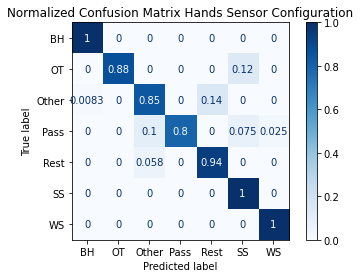

In [21]:
cmd = ConfusionMatrixDisplay.from_predictions(y_test1,
                                              y_pred,
                                              display_labels=labels,
                                              normalize='true',
                                              cmap=plt.cm.Blues)
cmd.ax_.set_title("Normalized Confusion Matrix Hands Sensor Configuration")
plt.show()

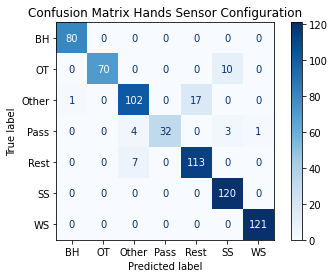

In [22]:
cmd = ConfusionMatrixDisplay.from_predictions(y_test1,
                                              y_pred,
                                              display_labels=labels,
                                              cmap=plt.cm.Blues)
cmd.ax_.set_title("Confusion Matrix Hands Sensor Configuration")
plt.show()